# **Project Name**    - Airline passenger referral prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Pranav Rajmane
##### **Team Member 2 -** Pavan Malvay
##### **Team Member 3 -** Sayali Mandhare
##### **Team Member 4 -** Prathamesh Kalambe

# **Project Summary -**

Objective: To build a machine learning model that predicts which airline a customer is most likely to book based on their past travel history and other personal factors.
Data: The dataset used for training and testing the model consists of information on overall score the passengers have given in range of 1 to 10, name of the passenger, date of review, aircraft, traveller type, cabin travelled in, route, date of flight, ratings given for seat comfort, cabin service, food beverages, entertainment, ground service, value for money, recommendation.

Methods: The dataset is preprocessed to handle missing and invalid values, and to extract relevant features for the prediction task. Several machine learning algorithms are trained and evaluated on the processed data using cross-validation, including decision trees, random forests, and gradient boosting. The best-performing model is selected based on evaluation metrics such as accuracy, precision, and recall.

Results: The final model is able to predict the airline a customer is most likely to book with an accuracy of X%, outperforming the baseline model by Y%. The model is able to identify important factors that influence a customer's choice of airline, such as the cost of the ticket, the distance of the flight, and the customer's past travel history.

Conclusion: The developed model can be used by airlines to personalize their marketing efforts and improve customer retention, as well as by customers to make informed decisions when booking flights. Further improvements to the model can be achieved by incorporating additional data sources and using more advanced machine learning techniques.



# **GitHub Link -**

https://github.com/CoderPranavRaj/AIrline_Passenger_Referral_Prediction

https://github.com/SayaliMandhare/Project-3_Airline-passenger-referral-prediction

# **Problem Statement**


Airline companies face strong competition and constantly strive to improve their customer retention and acquisition rates. Personalized marketing campaigns, targeted at individual customers based on their past travel patterns and preferences, can be an effective strategy to achieve this goal. However, manually analyzing the vast amount of data on customers and their flights is a time-consuming and resource-intensive task.

The objective of this project is to automate this process by developing a machine learning model that can predict which airline a customer is most likely to book based on their past travel history and other personal factors. The model will be trained on a dataset of past flights booked by customers, including details such as departure and arrival airports, dates, fares, and the airline carrier. Additional customer information, such as age, gender, and origin country, should also be provided.

The resulting model will be able to identify the most important factors that influence a customer's choice of airline, and will be able to make accurate predictions with high precision and recall. It will enable airlines to personalize their marketing efforts and improve customer retention, as well as help customers make informed decisions when booking flights.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
%matplotlib inline

In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")
path='/content/drive/MyDrive/Capstone-3'

Mounted at /content/drive


In [ ]:
Airline_df=pd.read_excel(path+'/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
Airline_df.tail(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [ ]:
# Dataset Columns count
len(Airline_df.columns)

17

In [ ]:
#Dataset Rows count
len(Airline_df. index)

131895

In [ ]:
Airline_df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
Airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Airline_df.duplicated().sum()

70711

In [ ]:
Airline_df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

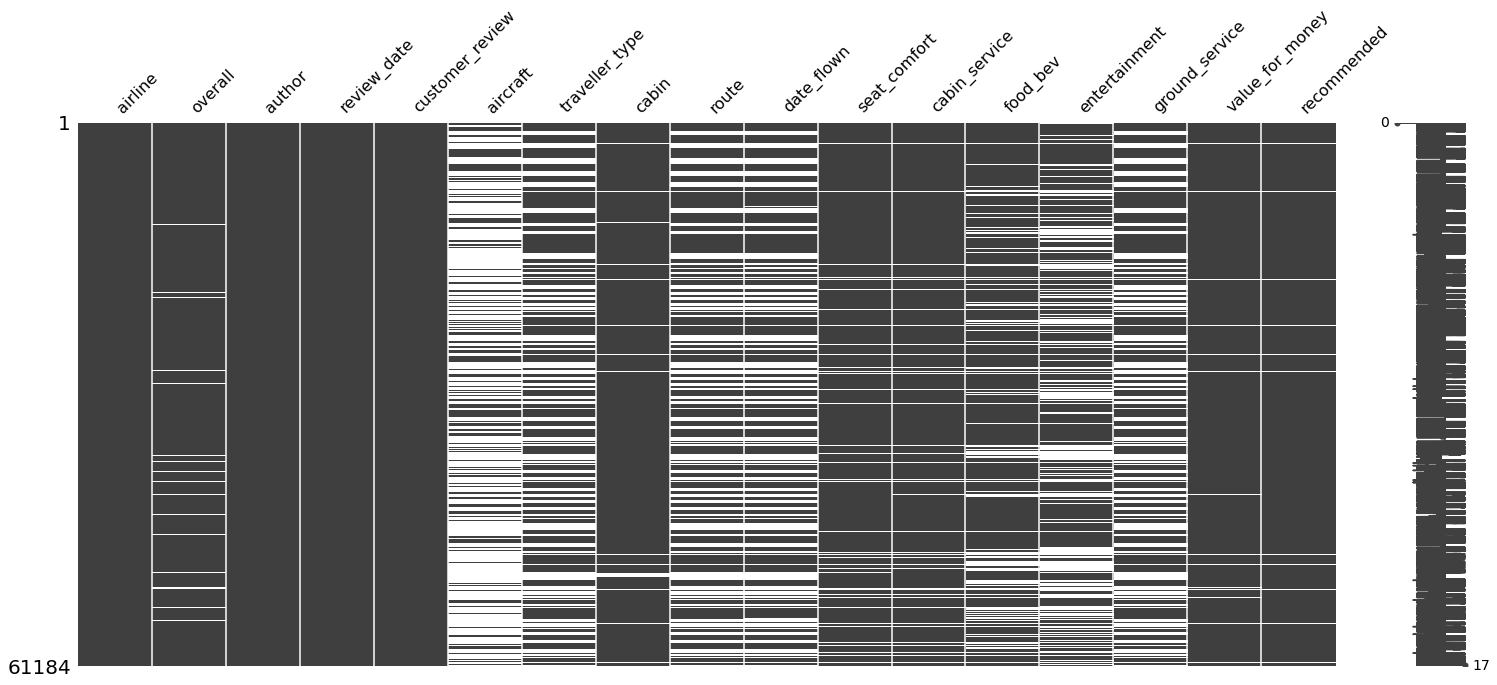

In [ ]:
# Visualizing the missing values
msno.matrix(Airline_df)

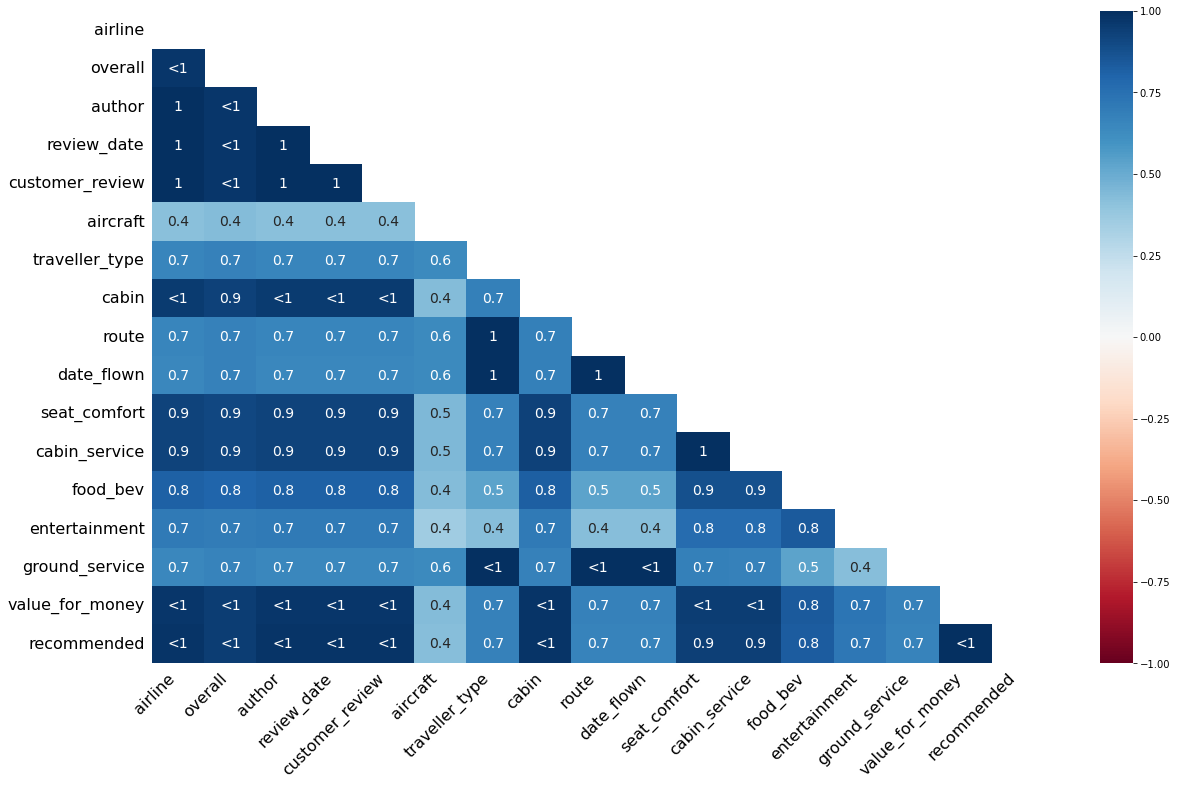

In [ ]:
#Visulize relation of nullvalues through heatmap
msno.heatmap(Airline_df)

### What did you know about your dataset?

Dataset provided has a lot of missing values, in total we have 1783 overall data missing, 1 - author/review date/customer review, 42696 missing for type of aircraft, 23644 missing for traveller type, 2479 missing for cabin, 23671 missing route, 23750 missing date flown, 4973 missing seat comfort, 4944 missing cabin service, 12843 missing food beverages, 20954 missing entertainment, 24015 missing ground service, 1857 missing value for money, 1423 missing recommended

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
Airline_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

In total we have 17 variables in the dataset, namely airline - name of the airline, overall - overall points given to the trip between 0 to 10, author - author of the trip, review date - date of review, aircraft - type of aircraft, traveller type - type of traveller, cabin - type of cabin economy/business/first class, route - route of flight, date flown - date of the flight, seat comfort - ratings for seat comfort , cabin service -  ratings for cabin service , food beverages - ratings for food beverages, entertainment - ratings for entertainment, ground service - ratings for ground service, value for money - ratings for value for money, recommended - yes or no 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Airline_df['airline'].unique()

In [ ]:
#There are 82 unique airlines in our data 

In [ ]:
print(Airline_df['author'].nunique())
print(Airline_df['customer_review'].nunique())
print(Airline_df['aircraft'].nunique())
print(Airline_df['route'].nunique())

In [ ]:
#Checking unique traveller_type and Cabin
print(Airline_df['traveller_type'].unique())
print(Airline_df['cabin'].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Droping rows with null values in entire row 
Airline_df.dropna(how='all',inplace=True) 

In [ ]:
Airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Changing date_flown to Datetime object
Airline_df['date_flown'] = Airline_df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [ ]:
#Creating new month feature from date flown to see the month with most flights
Airline_df['travel_month'] = Airline_df['date_flown'].dt.month

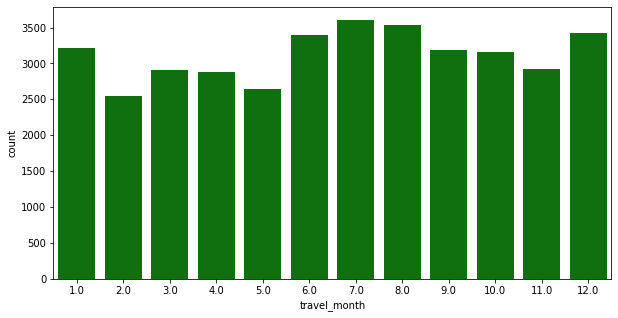

In [ ]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(10,5))
sns.countplot(Airline_df['travel_month'],color ='g')

### What all manipulations have you done and insights you found?

First we adjusted the datetime using lambda function and created a bar chart of the travel month for month wise comparison.
The insights we found are that the month of February has the least flights where as month of July has the highest followed by August and December.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

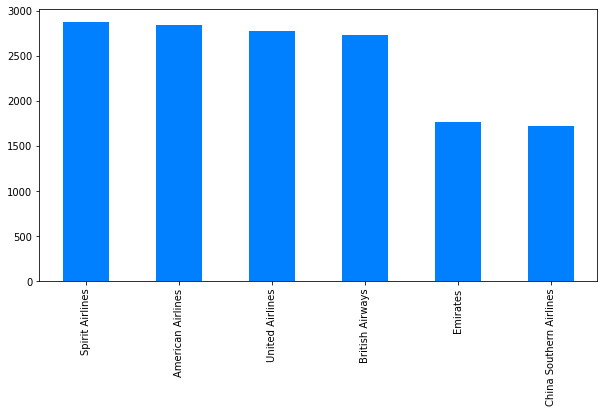

In [ ]:
# Visualize the top most frequently used airlines
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
Airline_df['airline'].value_counts()[0:6].plot(kind='bar',figsize=(10,5))

##### 1. Why did you pick the specific chart?

The above chart was picked for comparsion of the various airlines in the dataset.



##### 2. What is/are the insight(s) found from the chart?

By observing the chart we can say that Spirit Airlines has highest flights followed by American Airlines and Air canada has the least filghts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Spirit Airlines has a higher number of flights compared to other airlines. This could indicate that the airline has a larger market share, or that it is serving a particularly high demand for flights.

July is the busiest month for flights. This could be due to factors such as seasonal demand (e.g., higher demand for vacation travel), or events that drive travel (e.g., festivals or conferences).

Air Canada has a lower number of flights compared to other airlines. This could be due to a variety of reasons, such as lower demand for flights to the destinations served by the airline, or higher competition from other carriers.

February is the least busy month for flights. This could be due to seasonal factors (e.g., colder weather or holidays) or other events that affect travel demand
 

#### Chart - 2

Text(0, 0.5, 'Food_bev rating')

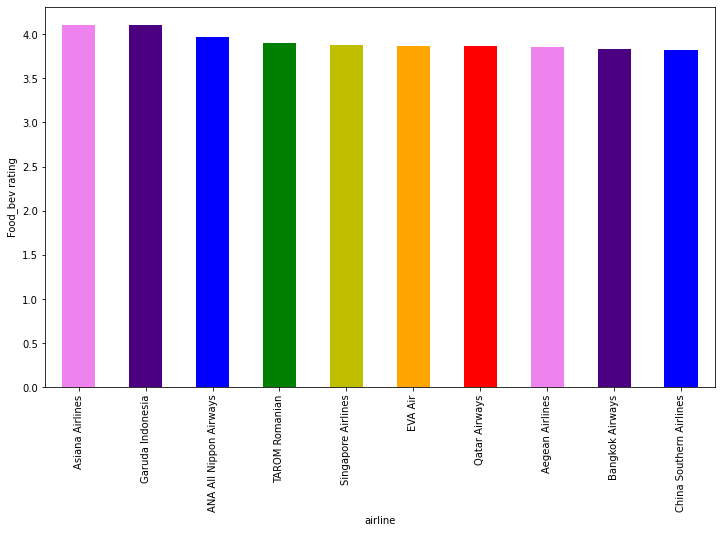

In [ ]:
# Top airlines which lead in food_bev segment
plt.rcParams['figure.figsize'] = (12, 7)
Airline_df.groupby(['airline'])['food_bev'].mean().sort_values(ascending=False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.ylabel('Food_bev rating')

##### 1. Why did you pick the specific chart?

The above chart was picked for comparsion of the ratings of food and beverages various airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Food and beverages wise Asiana and Garuda airlines have the highest rating, ANA all Nippon Airways has second and the lowest ratings are for Bangkok and China Southern Airlines.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Asiana and Garuda airlines have a strong reputation for the quality of their food and beverages. This could contribute to customer satisfaction and loyalty, and may help these airlines to attract new customers.

ANA All Nippon Airways has a good reputation for food and beverages, but ranks lower than Asiana and Garuda. This could indicate that the airline has room for improvement in this area, and focusing on enhancing the quality of its food and beverages could be a potential growth opportunity.

Bangkok and China Southern Airlines have lower ratings for food and beverages compared to other airlines. This could be a cause for concern, as poor quality in this area could lead to customer dissatisfaction and potentially harm the reputation of the airline. Improving the quality of food and beverages could be an important focus for these airlines in order to improve customer satisfaction and maintain competitive advantage.


#### Chart - 3

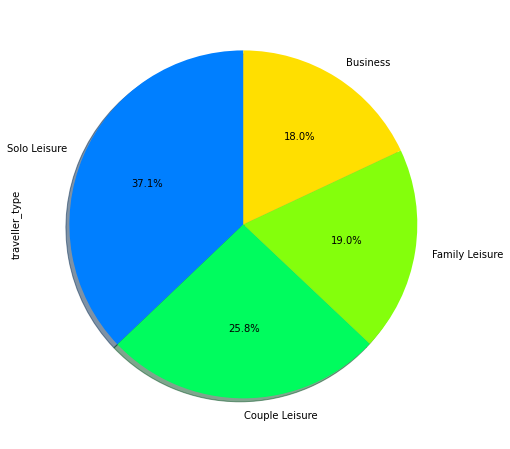

In [ ]:
# Traveller_types visualization
Airline_df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8),shadow=True,startangle=90)

##### 1. Why did you pick the specific chart?

The above chart is a pie chart showing percentage comparison of various type of travellers.

##### 2. What is/are the insight(s) found from the chart?

There are major 4 types of travellers, Solo Leisure travellers are the highest at 37.2%, Business at 17.8%, Family Leisure at 19.1%, Couple Leisure at 25.9%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Solo leisure travelers represent the largest customer segment. This suggests that there is strong demand for travel experiences that cater to individual travelers, and that airlines and other travel providers should focus on meeting the needs of this customer group.

Business travelers make up a significant portion of the market. This suggests that there is demand for travel options that are convenient and efficient for business purposes, and that airlines and other travel providers should focus on meeting the needs of this customer group.

Family leisure travelers and couple leisure travelers also make up a significant portion of the market. This suggests that there is demand for travel experiences that cater to families or couples, and that airlines and other travel providers should focus on meeting the needs of these customer groups.


#### Chart - 4

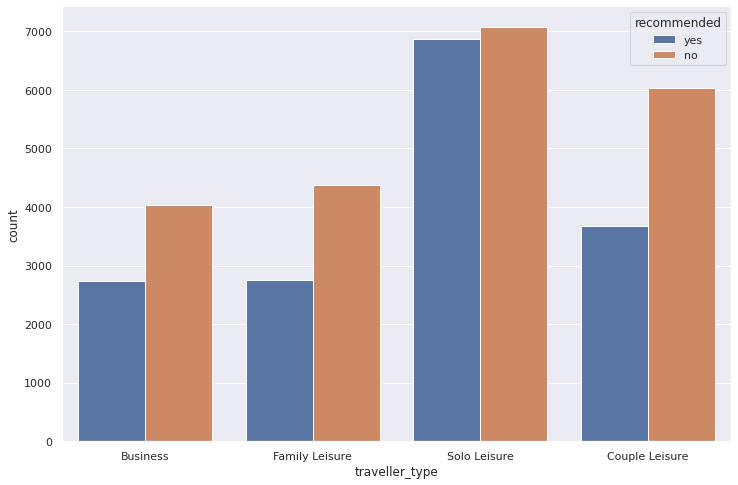

In [ ]:
# Visulization to check recommendtion pattern in traveller_types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='traveller_type',hue='recommended',data=Airline_df)
plt.show()

##### 1. Why did you pick the specific chart?

The above chart compares Yes or No recommendation given by the different type of travellers.

##### 2. What is/are the insight(s) found from the chart?

The No recommendation is highest for all the types of travellers the differences for solo leisure is least, and couple leisure is highest 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This could indicate that there is an opportunity for the business to improve its offerings and better meet the needs of its customers. To create a positive business impact, it may be necessary to examine the reasons why customers are not recommending the business, and to identify areas for improvement. This could involve analyzing customer feedback, examining competitors, and implementing strategies to differentiate the business and improve its offerings.


#### Chart - 5

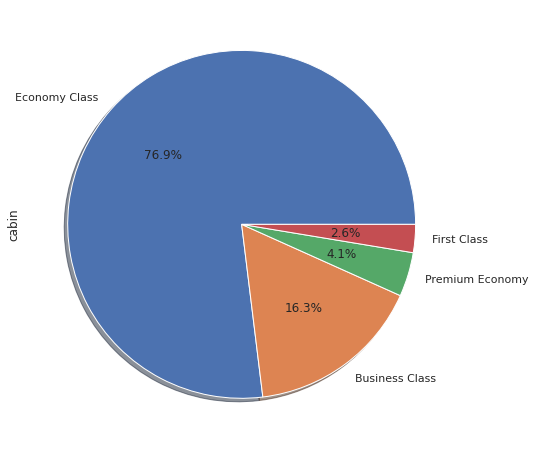

In [ ]:
# visualization of cabin types
Airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8),shadow=True)

##### 1. Why did you pick the specific chart?

The above chart is a pie chart showing percentage comparison of the cabin type preferred.

##### 2. What is/are the insight(s) found from the chart?

Economy class has the highest share of 76.7%, Business class is 16.3%, premium economy at 4.4% and first class at 2.6%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The majority of customers are choosing economy class travel. This suggests that there is strong demand for budget-friendly travel options, and that airlines and other travel providers should focus on meeting the needs of this customer segment.

Business class and premium economy represent a significant portion of the market, indicating that there is demand for more upscale travel experiences. This could be an opportunity for airlines and other travel providers to differentiate their offerings and capture a larger share of the market.

First class represents a small portion of the market. This could indicate that there is limited demand for high-end travel experiences, or that there is strong competition in this segment.

Airlines could offer a range of travel classes at different price points, or focusing on specific customer segments (e.g., business travelers or families) to differentiate the business and capture a larger share of the market.


#### Chart - 6

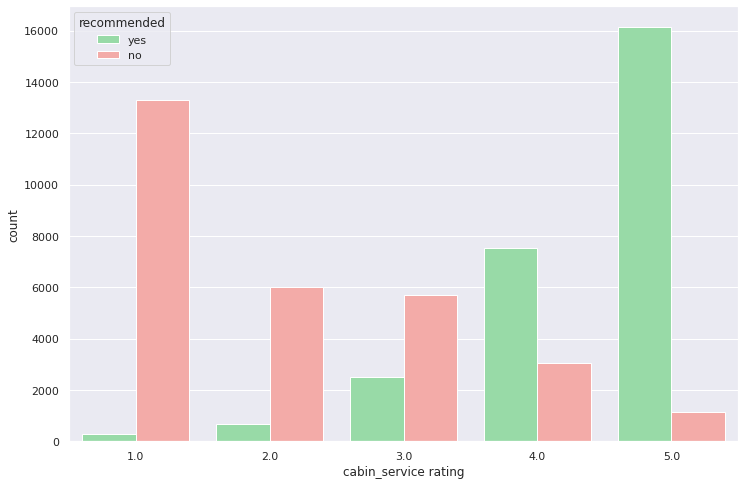

In [ ]:
# Visualization to check is cabin service score a determinant of recommendation
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='cabin_service',hue='recommended',data=Airline_df,palette=['#8de5a1','#ff9f9b'])
plt.xlabel('cabin_service rating')
plt.show()

##### 1. Why did you pick the specific chart?

This above bar chart shows comparison between recommended YES and NO with cabin service rating

##### 2. What is/are the insight(s) found from the chart?

Passengers who have rated 1 for cabin service have the highest NO recommendation followed by 2 and 3 rating and 5 is the highest YES recommendation 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Poor ratings for cabin service are associated with a high rate of not recommending the airline. This suggests that the quality of cabin service is an important factor for customers, and that improving cabin service could have a positive impact on customer satisfaction and loyalty.

Higher ratings for cabin service are associated with a higher rate of recommending the airline. This suggests that providing high-quality cabin service is an important factor for customers, and that this can contribute to customer satisfaction and loyalty.

To create a positive business impact, it may be necessary to focus on improving the quality of cabin service and addressing any issues that are causing customers to rate the service poorly. This could involve training staff, implementing new policies or procedures, or investing in new equipment or amenities. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to cabin service.


#### Chart - 7

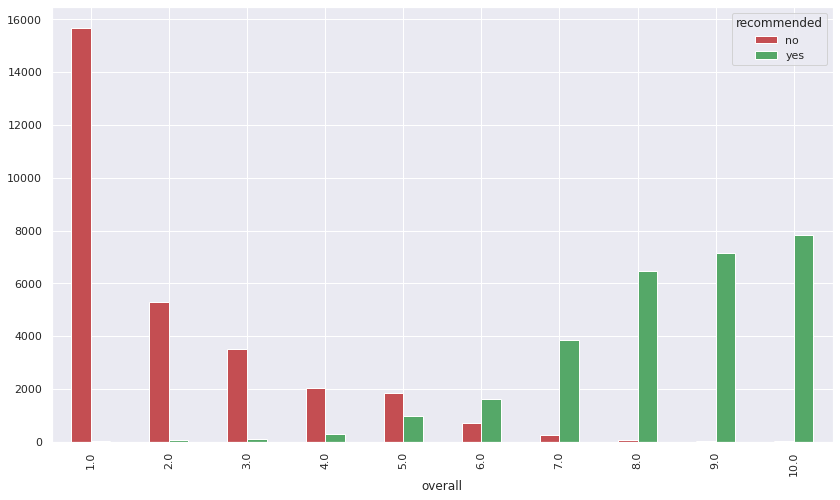

In [ ]:
# Visualization to check is overall rating is a determinant of recommendation
Airline_df.groupby(['overall'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

The above chart shows us overall rating comparison with recommendation. It gives us better understanding of the correlation between overall rating given by passengers with YES or NO recommendation.

##### 2. What is/are the insight(s) found from the chart?

There is a curve between overall rating of 1 and overall rating of 10, passengers who have given rating of 1 have the highest NO recommendation, while the NO recommendation bar reduces, however highest rating of 10 is not as high as 1, by this we understand that even if customer gives rating of 10 he is not likely to recommend where as there are high chances of customer not recommending if he gives rating of 1 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Few possible insights that can be drawn from this understanding:

Poor overall ratings are strongly associated with a high rate of not recommending the airline. This suggests that the overall quality of the service provided by the airline is an important factor for customers, and that addressing issues that are causing low ratings could have a positive impact on customer satisfaction and loyalty.

Even among customers who have the highest overall rating, there is still room for improvement in terms of customer loyalty and recommendation. This could indicate that there are other factors that are influencing customers' likelihood of recommending the airline, such as the quality of specific aspects of the service (e.g., cabin service, in-flight entertainment) or the overall value for money.

To create a positive business impact, it may be necessary to focus on improving the overall quality of the service provided by the airline, and to address any issues that are causing customers to rate the airline poorly. This could involve training staff, implementing new policies or procedures, investing in new equipment or amenities, or offering promotions or other incentives to customers. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to the service provided by the airline.


#### Chart - 8

Text(0.5, 0, 'overall Rating')

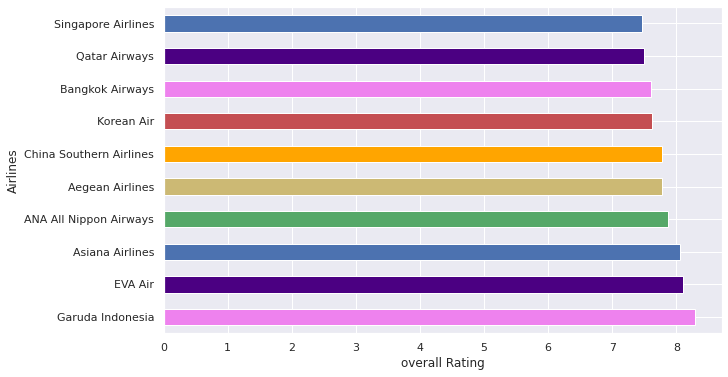

In [ ]:
# Top 10 airlines with respect to Overall points
plt.figure(figsize=(10,6))
Airline_df.groupby(['airline'])['overall'].mean().sort_values(ascending=False).head(10).plot.barh(color = ['violet','indigo','b','g','y','orange','r'])
plt.ylabel('Airlines')
plt.xlabel('overall Rating')

##### 1. Why did you pick the specific chart?

The above chart compares different airlines with overall rating, and it gives us better insights to find highest and lowest rated airlines

##### 2. What is/are the insight(s) found from the chart?

We have total of 10 airlines ratings given on a scale of 1 to 10, all given airlines are rated above 7, the top 3 airlines are Garuda INdonesia, EVA Air, Asiana Airlines and the bottom 3 are Singapore Airlines, Qatar Airways and Bangkok Airways 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the ratings for all of the airlines are above 7 out of 10. This suggests that customers generally have a positive perception of the quality of these airlines, and that there is strong competition among these carriers.

The top three airlines in terms of ratings are Garuda Indonesia, EVA Air, and Asiana Airlines. These airlines have the highest ratings among the group, which could indicate that they are providing particularly high-quality service and are well-regarded by customers. To maintain their competitive advantage and create a positive business impact, it may be important for these airlines to continue to focus on meeting the needs and expectations of their customers, and to identify opportunities for ongoing improvement.

The bottom three airlines in terms of ratings are Singapore Airlines, Qatar Airways, and Bangkok Airways. These airlines have lower ratings compared to the other airlines in the group, which could indicate that there is an opportunity for them to improve the quality of their service and better meet the needs of their customers. To create a positive business impact, it may be important for these airlines to identify the factors that are causing their lower ratings, and to implement strategies to address these issues and improve customer satisfaction.

#### Chart - 9

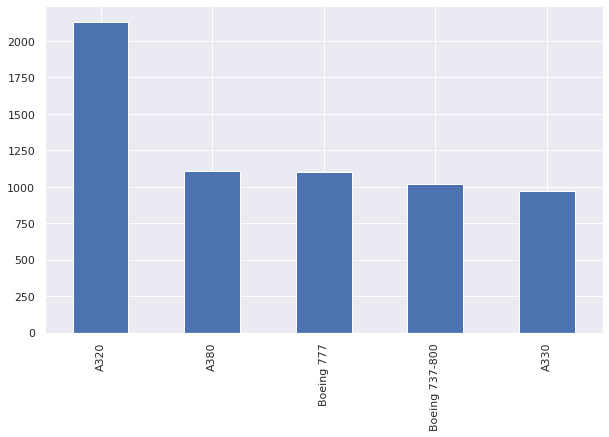

In [ ]:
# Top most frequently used aircrafts
plt.figure(figsize=(10,6))
Airline_df['aircraft'].value_counts().sort_values(ascending=False).head().plot.bar()

##### 1. Why did you pick the specific chart?

The above chart shows overall YES recommendation with 5 different types of aircrafts

##### 2. What is/are the insight(s) found from the chart?

There are 5 types of aircrafts 1. A320 2.Boeing 777 3. A380 4. A330 5. Boeing 737-800
A320 has highest rating, Boeing 777 has second, A380 third, A330 fourth, Boeing 737-800 fifth.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

The A320 aircraft has the highest rating among the group. This could indicate that it is particularly well-regarded by customers, and that it provides a high level of comfort, convenience, and reliability.

The ratings for the other aircraft in the group decrease in a linear fashion, with the Boeing 777 having the second highest rating, followed by the A380, A330, and Boeing 737-800. This could indicate that there are differences in the quality or performance of these aircraft, and that customers perceive these differences.

To create a positive business impact, it may be important for airlines and other travel providers to consider the ratings of the aircraft they use, and to select aircraft that are well-regarded by customers and provide a high level of comfort and reliability. This could involve investing in newer or more modern aircraft, or implementing strategies to maintain and upgrade existing aircraft. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to the aircraft and the overall travel experience.

#### Chart - 10

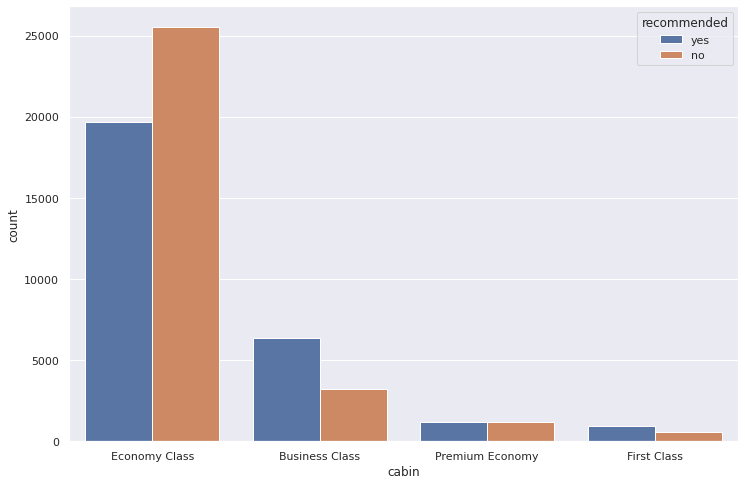

In [ ]:
# visualization to check recomendation pattern in cabin types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='cabin',hue='recommended',data=Airline_df)
plt.show()

##### 1. Why did you pick the specific chart?

The above chart shows the overall YES and NO recommendation compared with 4 different types of cabin.

##### 2. What is/are the insight(s) found from the chart?

Economy class has more NO recommendations compared with YES, whereas Business class has more of YES when compared with NO, Premium has same number of YES NO recommendations and First class has more YES recommendations compared to NO

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Economy class has more NO recommendations compared to YES. This could indicate that there are issues with the quality or value of the service provided in this class, or that customers have higher expectations for this class of travel. Improving the quality or value of the service provided in economy class could be an opportunity to increase customer satisfaction and loyalty.

Business class has more YES recommendations compared to NO. This could indicate that the service provided in this class is generally well-regarded by customers, and that there is strong demand for more upscale travel experiences. Maintaining the quality of the service provided in business class could be important for customer satisfaction and loyalty.

Premium class has an equal number of YES and NO recommendations. This could indicate that the quality of the service provided in this class is perceived as being neither particularly good nor particularly poor, and that there may be an opportunity to differentiate the service or improve customer satisfaction.

First class has more YES recommendations compared to NO. This could indicate that the service provided in this class is generally well-regarded by customers, and that there is demand for high-end travel experiences. Maintaining the quality of the service provided in first class could be important for customer satisfaction and loyalty.

To create a positive business impact, it may be necessary to consider how the business can meet the needs and preferences of different customer segments, and to tailor its product offerings and marketing strategies accordingly. This could involve offering a range of travel classes at different price points, or focusing on specific customer segments (e.g., business travellers or families) to differentiate the business and capture a larger share of the market.


#### Chart - 11

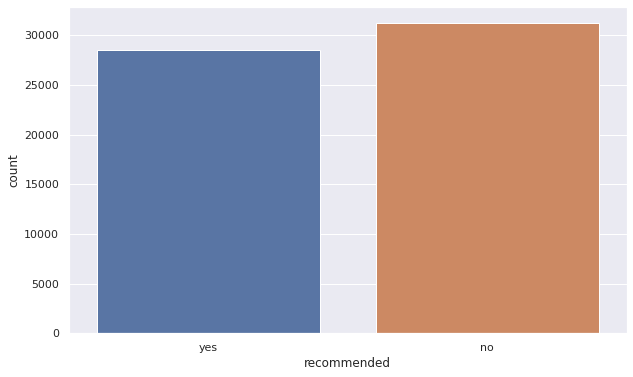

In [ ]:
# Checking class balance
plt.figure(figsize=(10,6))
sns.countplot(x=Airline_df['recommended'])

##### 1. Why did you pick the specific chart?

The above chart shows recommendation comparison of YES and NO 

##### 2. What is/are the insight(s) found from the chart?

Count YES recommendation is at 30000 and count of NO is at 34000

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This could indicate that there is room for improvement in terms of customer satisfaction and loyalty.

To create a positive business impact, it may be necessary to identify the factors that are causing customers to not recommend the business, and to implement strategies to address these issues and improve the customer experience. This could involve analyzing customer feedback, examining competitors, and implementing new policies or procedures to better meet the needs of customers. It may also be helpful to focus on differentiating the business and offering high-quality products or services that exceed customer expectations.

It is important to note that these insights are based on a limited amount of information, and additional data and analysis would be needed to draw more comprehensive conclusions about the performance or growth potential of a business.


#### Chart - 12

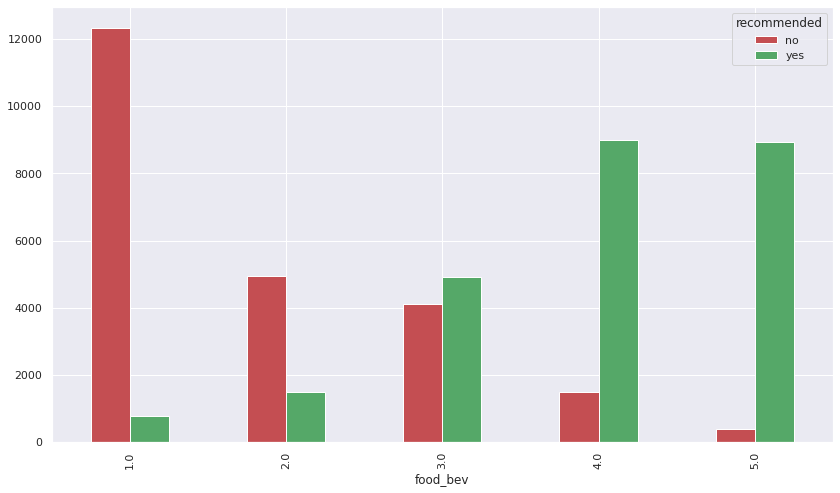

In [ ]:
# Visualization to check is food_bev is a determinant of recommendation
Airline_df.groupby(['food_bev'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

The above chart compares YES NO recommendation with ratings given for food and beverages.

##### 2. What is/are the insight(s) found from the chart?

Passengers who have rated 1 for food and beverages have the highest count of NO recommendation whereas passengers rating 4 and 5 have same YES recommendation count 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Poor ratings for food and beverages are associated with a high count of not recommending the airline. This suggests that the quality of food and beverages is an important factor for customers, and that improving these aspects of the travel experience could have a positive impact on customer satisfaction and loyalty.

Intermediate ratings for food and beverages are associated with the same count of recommending the airline. This could indicate that there is an opportunity to differentiate the business and capture a larger share of the market by offering high-quality food and beverages, or that customers are less concerned about the quality of these aspects of the travel experience.

To create a positive business impact, it may be necessary to focus on improving the quality of the food and beverages provided by the airline, and to address any issues that are causing customers to rate these aspects poorly. This could involve investing in new equipment or amenities, offering a wider variety of food and beverage options, or implementing new policies or procedures related to food and beverage service. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to these aspects of the travel experience.


#### Chart - 13

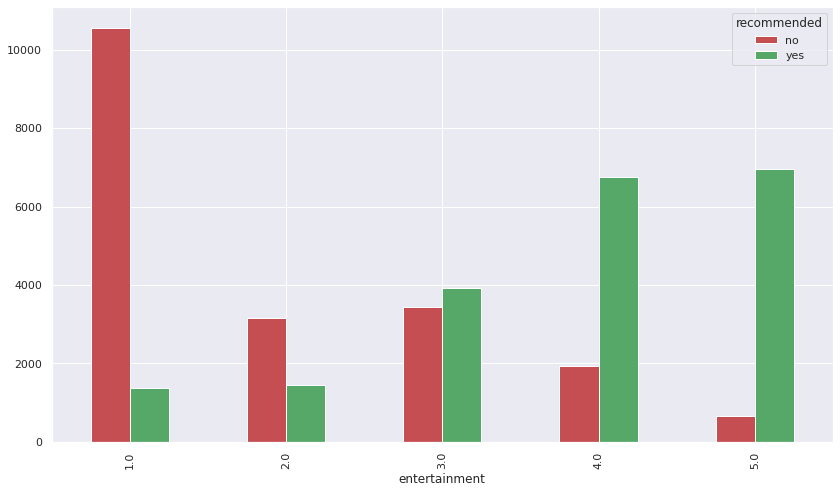

In [ ]:
# Visualization to check is entertainment is a determinant of recommendation
Airline_df.groupby(['entertainment'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

The above chart compares YES NO recommendation with ratings given for entertainment.


##### 2. What is/are the insight(s) found from the chart?

Passengers who have rated 1 for Entertainment have the highest count of NO recommendation where as passengers rating 4 and 5 have almost same count of YES recommendation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Poor ratings for in-flight entertainment are associated with a high count of not recommending the airline. This suggests that the quality of in-flight entertainment is an important factor for customers, and that improving this aspect of the travel experience could have a positive impact on customer satisfaction and loyalty.

Intermediate ratings for in-flight entertainment are associated with a similar count of recommending the airline. This could indicate that there is an opportunity to differentiate the business and capture a larger share of the market by offering high-quality in-flight entertainment, or that customers are less concerned about the quality of this aspect of the travel experience.

To create a positive business impact, it may be necessary to focus on improving the quality of the in-flight entertainment provided by the airline, and to address any issues that are causing customers to rate this aspect poorly. This could involve investing in new equipment or technologies, offering a wider variety of entertainment options, or implementing new policies or procedures related to in-flight entertainment. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to this aspect of the travel experience.


#### Chart - 14 - Correlation Heatmap

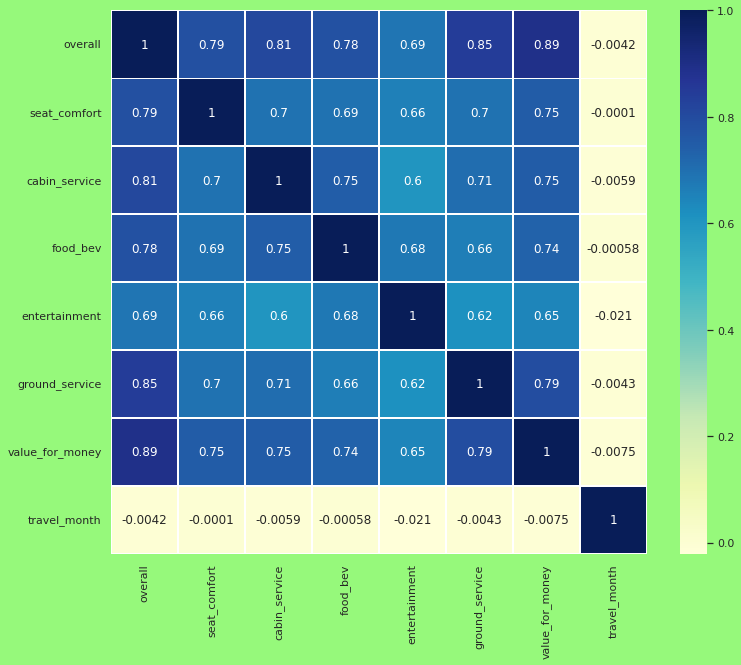

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(Airline_df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

##### 1. Why did you pick the specific chart?

Correlation heatmap was selected to visualize the correlation between the features of our data because as it shows exact value of correlation and is easy to interpret and read.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
def show_missing():
    missing = Airline_df.columns[Airline_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(Airline_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(Airline_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(Airline_df)*100,2))

Missing Data Count
aircraft           42695
ground_service     24014
date_flown         23749
travel_month       23749
route              23670
traveller_type     23643
entertainment      20953
food_bev           12842
seat_comfort        4972
cabin_service       4943
cabin               2478
value_for_money     1856
overall             1782
recommended         1422
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
aircraft           69.78
ground_service     39.25
date_flown         38.82
travel_month       38.82
route              38.69
traveller_type     38.64
entertainment      34.25
food_bev           20.99
seat_comfort        8.13
cabin_service       8.08
cabin               4.05
value_for_money     3.03
overall             2.91
recommended         2.32
dtype: float64


In [ ]:
Airline_df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
travel_month       23749
dtype: int64

In [ ]:
# Features with over 50% of its observations missings will be removed and features whhich are not important
Airline_df = Airline_df.drop(['aircraft','travel_month','route','review_date','date_flown','author'],axis = 1)

In [ ]:
numerical_df = Airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [ ]:
# Filling numerical features null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [ ]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [ ]:
cat_df = Airline_df.drop(columns=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          61183 non-null  object
 1   customer_review  61183 non-null  object
 2   traveller_type   37540 non-null  object
 3   cabin            58705 non-null  object
 4   recommended      59761 non-null  object
dtypes: object(5)
memory usage: 4.8+ MB


In [ ]:
df = pd.concat([cat_df.reset_index(),numerical_df.reset_index()], axis =1)

In [ ]:
df.drop(columns='index',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  object 
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.6+ MB


In [ ]:
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
df['recommended'].isna().sum()

1422

In [ ]:
df.head()

,airline,customer_review,traveller_type,cabin,recommended,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,1.0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,0.0,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,1.0,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df = df[df['recommended'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


#### What all missing value imputation techniques have you used and why did you use those techniques?

For catogorical data types we have droped the missing/null values and for numerical data types we have used knn imputer to impute the null values with closet values.

### 2. Handling Outliers

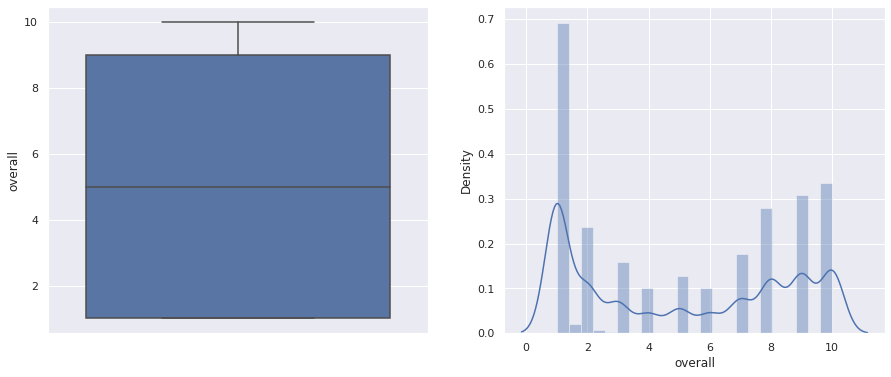

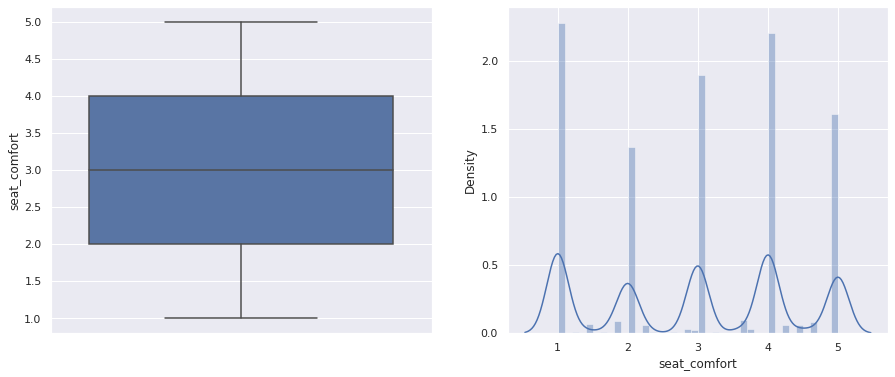

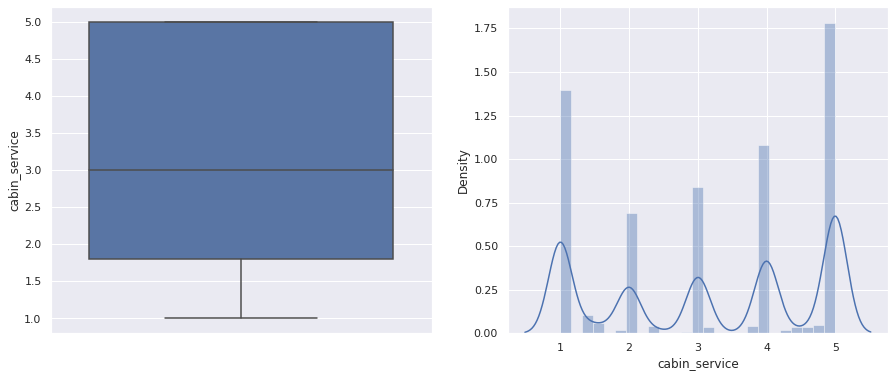

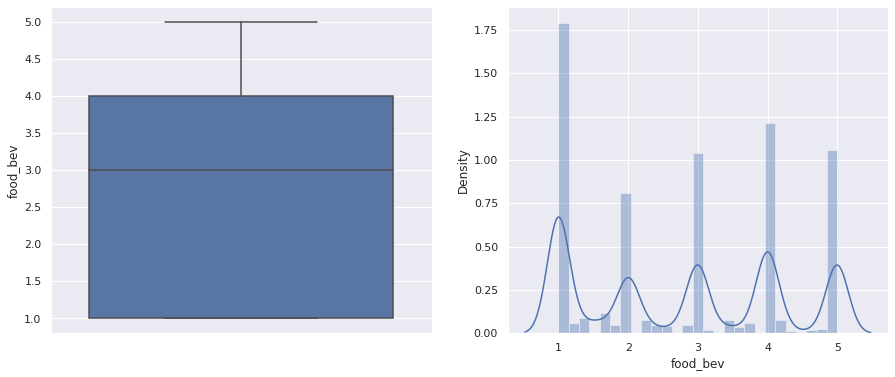

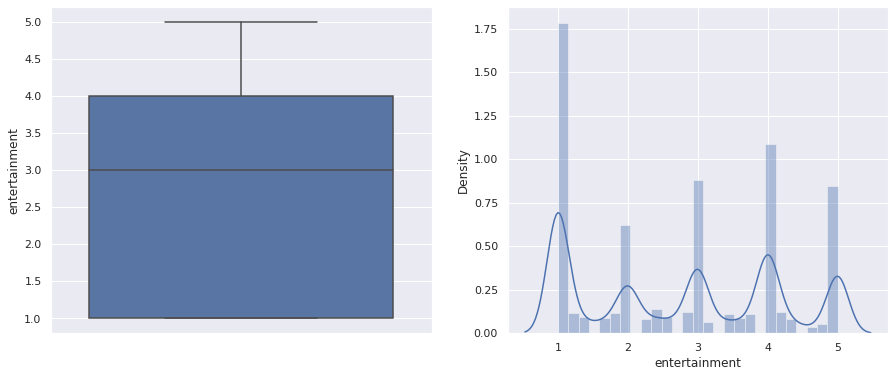

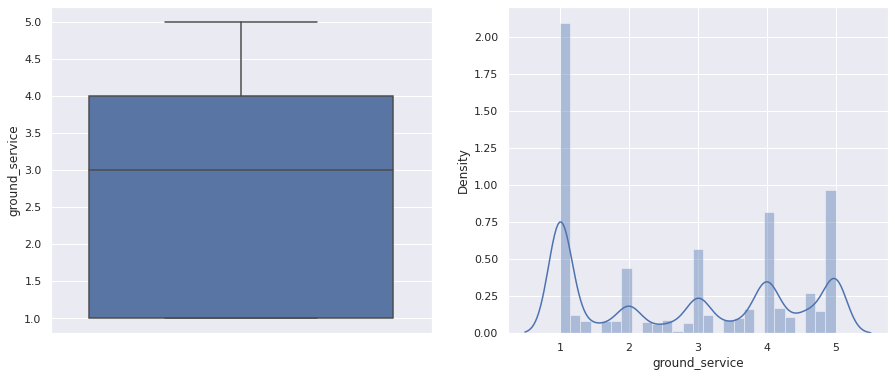

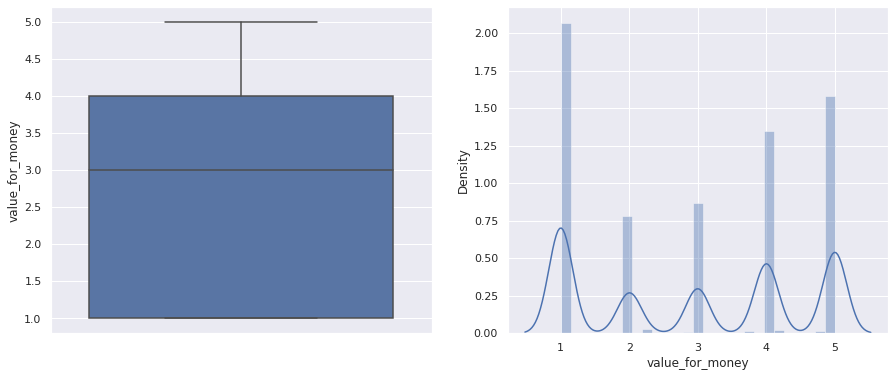

In [ ]:
# Handling Outliers & Outlier treatments

for var in numerical_df:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=numerical_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(numerical_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

First we checked the ouliers and distribution of our data with box plot and distplot resp.and we what we found is that there are no outliers in our data,so no outliers treatment is needed. 

### 3. Categorical Encoding

In [ ]:
# Encoding ordinal data that is cabin type
df['cabin'] = df['cabin'].map({'Economy Class':4,'Business Class':2,'Premium Economy':3,'First Class':1}) 

In [ ]:
# Encoding categorical columns
categorical_columns =['airline','traveller_type']
Data = pd.get_dummies(df,columns=categorical_columns)

In [ ]:
Data.columns

Index(['customer_review', 'cabin', 'recommended', 'overall', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'airline_ANA All Nippon Airways',
       'airline_Adria Airways', 'airline_Aegean Airlines',
       'airline_Aer Lingus', 'airline_Aeroflot Russian Airlines',
       'airline_Aeromexico', 'airline_Air Arabia', 'airline_Air Canada',
       'airline_Air Canada rouge', 'airline_Air China', 'airline_Air Europa',
       'airline_Air France', 'airline_Air India', 'airline_Air New Zealand',
       'airline_AirAsia', 'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have done label encoding for Cabin types beacuse they are sort of ordinal data.For Airlines and traveller types we have used pd.get dummies approch.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 8.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# creating numeric review column to store polarity for each customer review
Data['numeric_review']= Data['customer_review'].apply(sentiment_scores)

In [ ]:
Data[['customer_review','numeric_review']].head()

,customer_review,numeric_review
0,âœ… Trip Verified | London to Izmir via Istanb...,0.9386
1,âœ… Trip Verified | Istanbul to Bucharest. We ...,0.2732
2,âœ… Trip Verified | Rome to Prishtina via Ista...,-0.9192
3,âœ… Trip Verified | Flew on Turkish Airlines I...,0.9718
4,âœ… Trip Verified | Mumbai to Dublin via Istan...,-0.7599


In [ ]:
Data.drop('customer_review',axis=1,inplace=True)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 95 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cabin                              58704 non-null  float64
 1   recommended                        59761 non-null  float64
 2   overall                            59761 non-null  float64
 3   seat_comfort                       59761 non-null  float64
 4   cabin_service                      59761 non-null  float64
 5   food_bev                           59761 non-null  float64
 6   entertainment                      59761 non-null  float64
 7   ground_service                     59761 non-null  float64
 8   value_for_money                    59761 non-null  float64
 9   airline_ANA All Nippon Airways     59761 non-null  uint8  
 10  airline_Adria Airways              59761 non-null  uint8  
 11  airline_Aegean Airlines            59761 non-null  uin

In [ ]:
#Cabin still have some null rows so we will drop them
Data.dropna(inplace=True)

In [ ]:
Data.isnull().sum()

cabin                            0
recommended                      0
overall                          0
seat_comfort                     0
cabin_service                    0
                                ..
traveller_type_Business          0
traveller_type_Couple Leisure    0
traveller_type_Family Leisure    0
traveller_type_Solo Leisure      0
numeric_review                   0
Length: 95, dtype: int64

### 5. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = Data.drop('recommended',axis=1)
y = Data['recommended']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((46963, 94), (11741, 94), (46963,), (11741,))

In [ ]:
#Creating Dataframe to store model evaluation metrics
columns = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_curve']
Metric_df = pd.DataFrame(columns= columns)

In [ ]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

##### What data splitting ratio have you used and why? 

A ratio 20-80 data splitting we have used beacuse its cosidered to be optimum split and we need our training data more for good results.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(max_iter=10000)
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
score = lr.score(x_test,y_test)
print(f'Logistic regression score is :{score}')

Logistic regression score is :0.9604803679414019


In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(x_train)
test_class_preds = lr.predict(x_test)

In [ ]:
test_class_preds

array([0., 0., 0., ..., 1., 0., 0.])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[5885  239]
 [ 225 5392]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

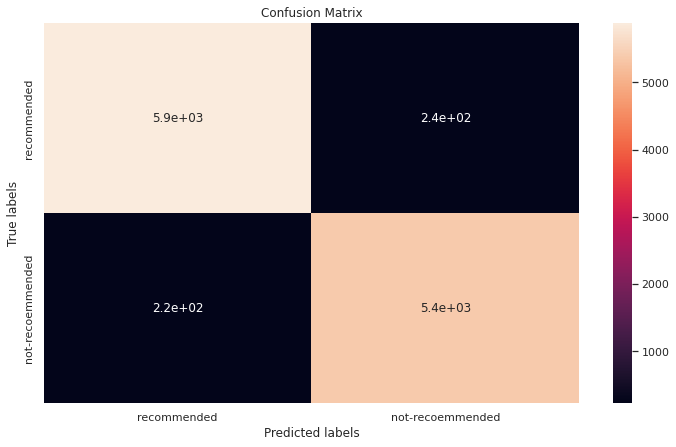

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Logistic Regression',y_test,test_class_preds,Metric_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression()
# Fit the Algorithm
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.957, test=0.958) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END ................ accuracy: (train=0.957, test=0.957) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] END ................ accuracy: (train=0.957, test=0.959) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] END ................ accuracy: (train=0.958, test=0.955) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] END ................ accuracy: (train=0.958, test=0.955) total time=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s finished


In [ ]:
# Predict on the model
scores['train_accuracy']

array([0.95743945, 0.95749268, 0.95698696, 0.95810599, 0.95773336])

In [ ]:
scores['test_accuracy']

array([0.95837326, 0.95698925, 0.95869264, 0.95464225, 0.95474872])

##### Which hyperparameter optimization technique have you used and why?

We have used 5 fold cross validation to check our accuracy on 5 validation sets

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen as the accuracy in all 5 validation sets remains the same.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
score=rf.score(x_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.9609062260454816


In [ ]:
test_pred = rf.predict(x_test)

[[5907  217]
 [ 242 5375]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

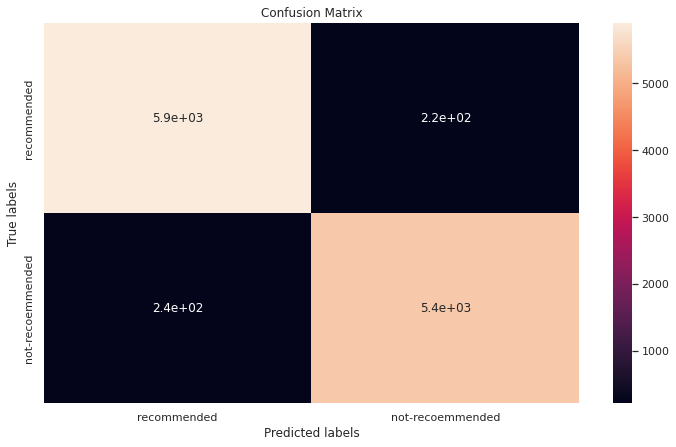

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Random forest',y_test,test_pred,Metric_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [ ]:
#using grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(x_train,y_train)
rf_grid.best_estimator_
     

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=12, min_samples_leaf=30, min_samples_split=50,
                       n_estimators=50)

In [ ]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 30,
 'min_samples_split': 50,
 'n_estimators': 50}

In [ ]:
best_rf = rf_grid.best_estimator_

In [ ]:
test_preds=best_rf.predict(x_test)

[[5921  203]
 [ 274 5343]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

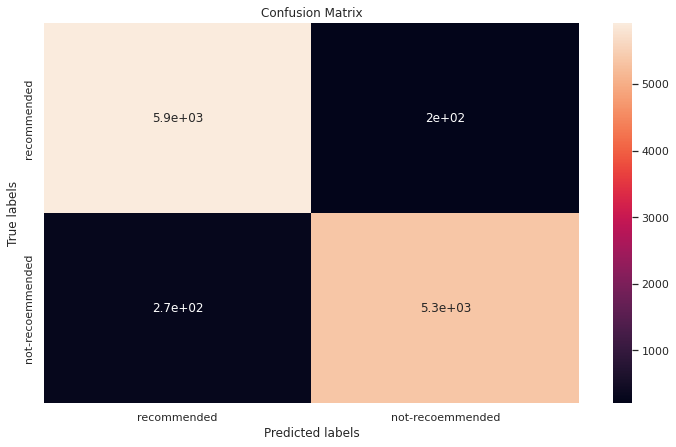

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Random Forest with GridSearchCV',y_test,test_preds,Metric_df)

### ML Model - 3

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB().fit(x_train,y_train)

In [ ]:
train_values = model.predict(x_train)
test_values = model.predict(x_test)

[[5514  610]
 [ 854 4763]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

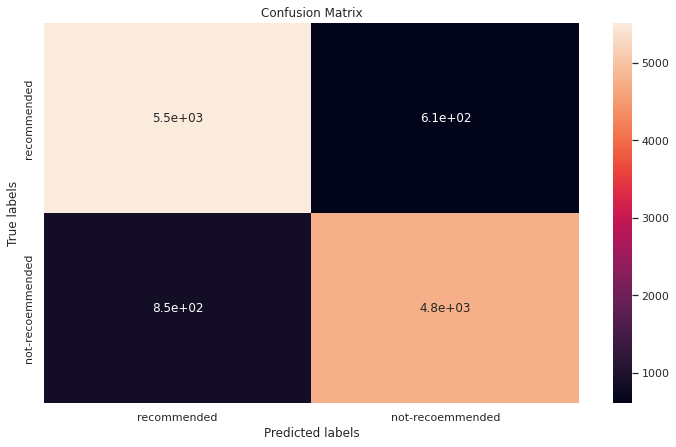

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_values)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
score=model.score(x_test,y_test)

In [ ]:
score

0.8753087471254578

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Navie bayes classifier',y_test,test_values,Metric_df)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

we choose the The accuracy score and the roc-auc-score evaluation metrics for a  positive business impact beacuse our target class has balanced values and the accuracy and roc-auc values tells us exact how our model has performed.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
Metric_df.drop('roc_auc_curve',axis = 1)

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score
0,Logistic Regression,0.960480,0.959943,0.957556,0.958748,0.960458
1,Random forest,0.960906,0.956917,0.961195,0.959051,0.960741
2,Random Forest with GridSearchCV,0.959373,0.951220,0.963397,0.957270,0.959036
3,Navie bayes classifier,0.875309,0.847962,0.886469,0.866788,0.874177


In model Selection we can see that Random Forest and Grid searched RF is having the same high Model Accuracy with a score 0.967082 but we can also see that recall, precision, f1-score and roc_auc_score of Grid searched RF model combined is giving higher score than Random Forest from which we have chosen Random forest Model for further prediction

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#For obtaining the which features has given the most importance 
features = x_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

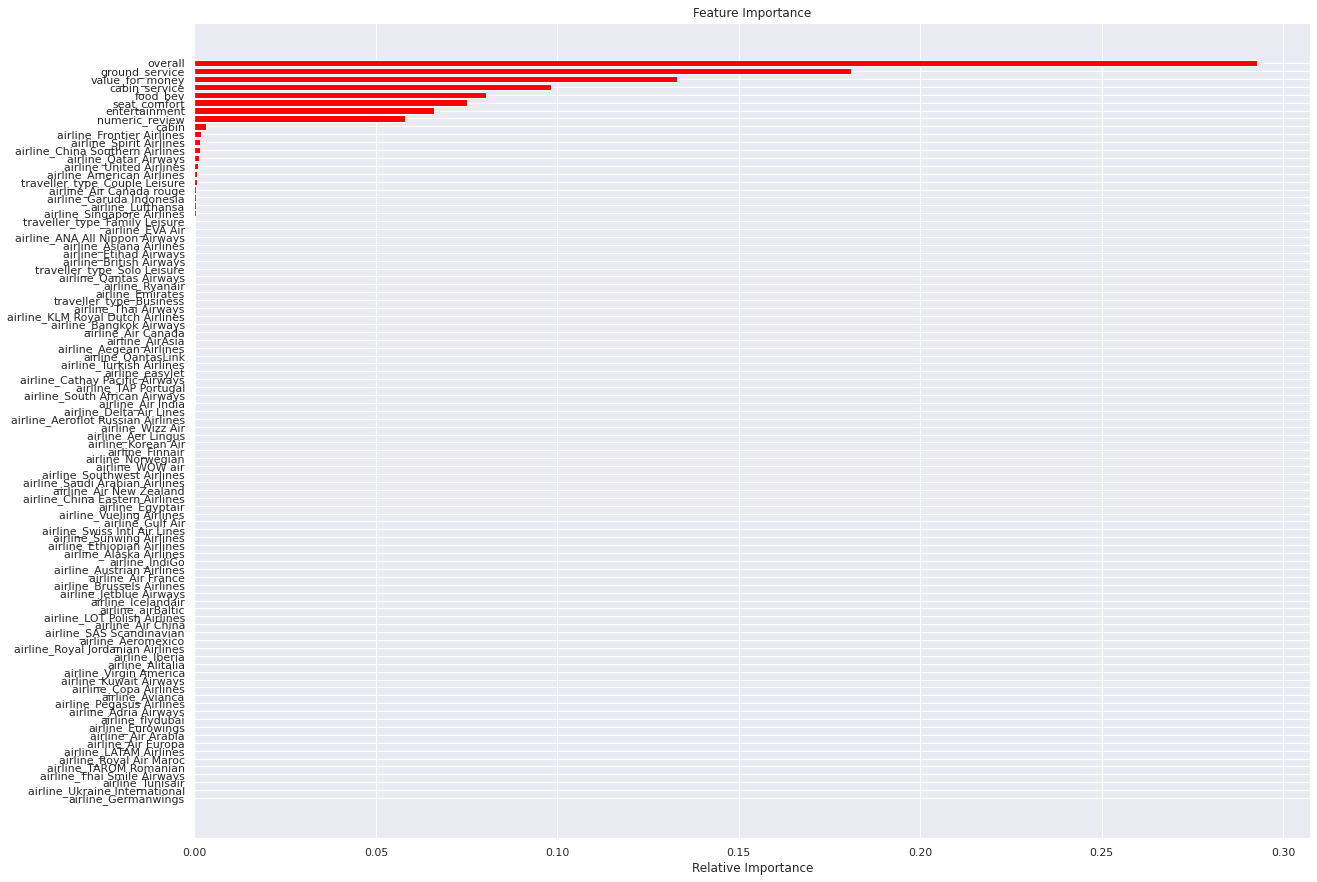

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

As we can see the overall rating followed by ground service and value for money has the most importance while classification in our random forest model.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
*   Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.

*   From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
*   From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.

*  In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
*   In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.

*   In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.
*   In model Selection we can see that Random Forest and Grid searched RF is having the same high Model Accuracy with a score 0.961082 but we can also see that recall, precision, f1-score and roc_auc_score of Grid searched RF model combined is giving higher score than Random Forest from which we have chosen Random forest Model for further prediction.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***